# **Exploratory Data Analysis on Most Streamed Spotify Songs 2023**

In [1]:
#Import the libraries that will be needed for the data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read and load the dataset
spotify_dataset = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify_dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## **Overview of Dataset**

### How many rows and columns does the dataset contain?

In [3]:
spotify_dataset.shape

(953, 24)

- Aside from loading the dataset, we can also use the code above to know the "shape" of the dataset which can tell us the number of rows and columns. As can be observed from above, the dataset has 953 rows and 24 columns.

### What are the data types of each column? Are there any missing values?

In [4]:
spotify_dataset.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

- The code above shows the datatypes of each column of the dataset.

In [5]:
#Looks for any missing value/s
missing_values = spotify_dataset.isnull().sum()
missing_dataset = missing_values[missing_values > 0].reset_index()

#Loads the columns in the dataframe with missing values
missing_dataset.columns = ['Column', 'Missing Values']
missing_dataset

,Column,Missing Values
0,in_shazam_charts,50
1,key,95


- The command above identifies which cells are null or has the missing values. After identifying, we can see that the columns "in_shazam_charts" and
  "key" has 50 and 95 missing values respectively.

## **Basic Descriptive Statistics**

### What are the mean, median, and standard deviation of the streams column?

In [6]:
# Make sure that there are no missing values in 'streams'
spotify_dataset['streams'] = pd.to_numeric(spotify_dataset['streams'], errors='coerce')  

#Calculates the mean, median, and standard deviation of the 'streams' column
strm_mean = spotify_dataset['streams'].mean()
strm_median = spotify_dataset['streams'].median()
strm_std = spotify_dataset['streams'].std()

#Creates a dataframe for the results
stats = pd.DataFrame({'Statistic': ['Mean', 'Median', 'Standard Deviation'],
                      'Value': [strm_mean, strm_median, strm_std]})

#Set the display option to avoid scientific notation in the entire code
stats.style.format({'Value': '{:.2f}'})


,Statistic,Value
0,Mean,514137424.94
1,Median,290530915.00
2,Standard Deviation,566856949.04


- The code above displays the mean, median, and standard deviation of the streams column. First, I made sure that the rows with missing values are excluded in the computation. Then in showing the results, I added a line that will show the values in decimals.  

### What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?

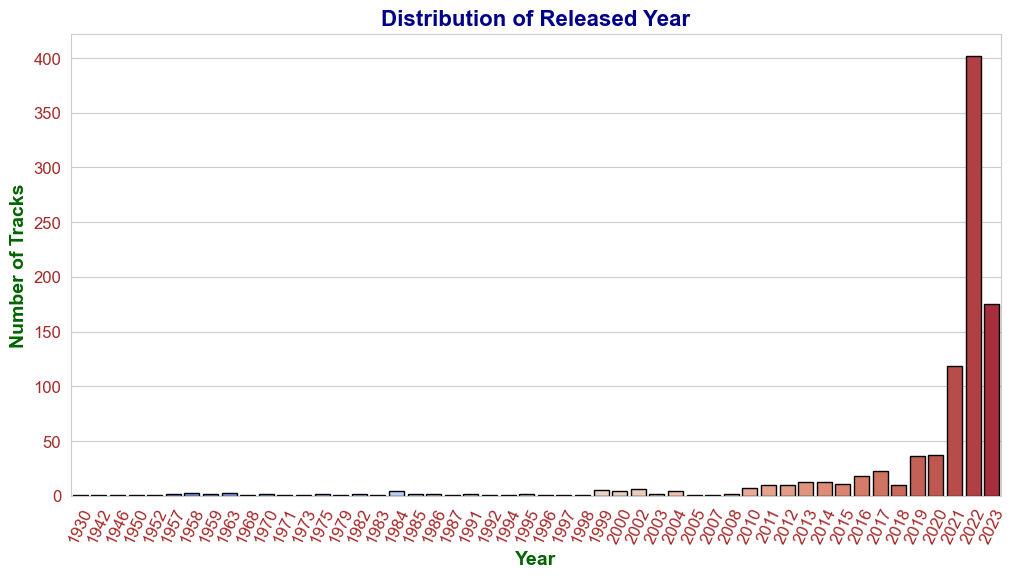

In [7]:
#Adjusts the color palette based on unique 'released_year' values to help in analyzing the plot
sns.set_style("whitegrid")
unique_years = spotify_dataset['released_year'].nunique()  
palette = sns.color_palette("coolwarm", unique_years)  

#Plot the distribution of 'released_year' using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='released_year', hue='released_year', data=spotify_dataset, palette=palette, edgecolor="black", legend=False)
plt.title('Distribution of Released Year', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=65, fontsize=12, color='brown')
plt.yticks(fontsize=12, color='brown')

plt.show()

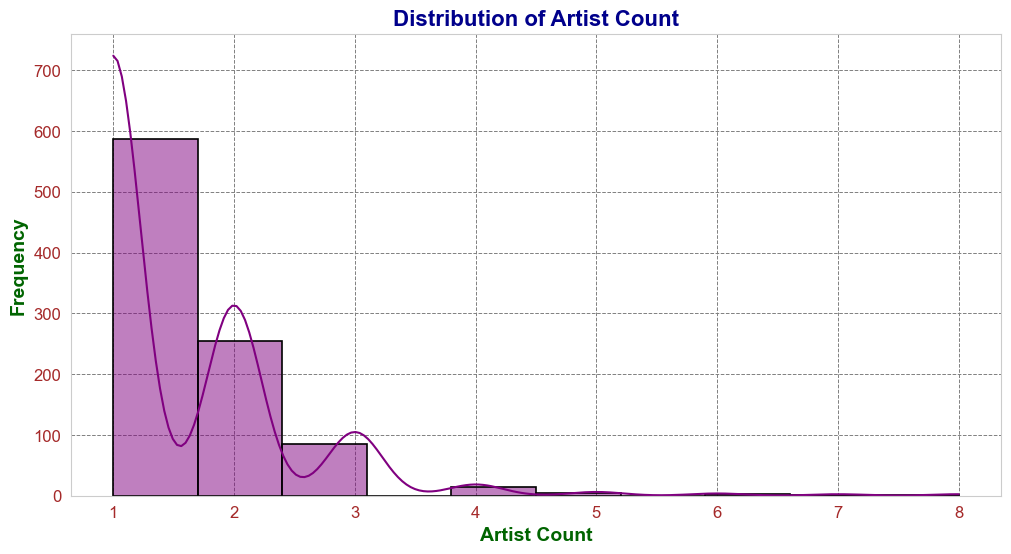

In [8]:
#Plot the distribution of 'artist_count' using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(spotify_dataset['artist_count'], bins=10, kde=True, color='purple', edgecolor="black", linewidth=1.2)
plt.title('Distribution of Artist Count', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Artist Count', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(fontsize=12, color='brown')
plt.yticks(fontsize=12, color='brown')
plt.grid(visible=True, linestyle='--', linewidth=0.7, color='gray')
plt.show()

- The codes above plots the Distribution of Released Year with Year in the x-axis and Number of Tracks in the y-axis, and the Distribution of Artist Count with the Artist Count in the x-axis and Frequency in the y-axis.
- In the first plot, we can observe that the years 2021, 2022, and 2023 are the years where the most number of tracks were distributed which can mean that the songs that are more recent are more popular.
- In the second plot, we can observe that solo artists dominates by being significantly higher than the rest.

## **Top Performers**

### Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [9]:
#Displays the top 5 tracks by streams
top = spotify_dataset[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(5)
top

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


- The code above displays the top 5 most streamed tracks. The track "Blinding Lights" by The Weeknd has the highest number of streams.

### Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [10]:
#Create a DataFrame for the artist counts
artist_counts = pd.DataFrame(spotify_dataset['artist(s)_name'].value_counts().reset_index())
artist_counts.columns = ['Artist', 'Track Count']

#Displays the top 5 most frequent artists
artist_counts.head(5)

,Artist,Track Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


- The code above displays the top 5 most frequent artists based on the number of tracks. Taylor Swift, The Weeknd, Bad Bunny, SZA, and Harry Styles are the artists in the top 5.

## **Temporal Trends**

### Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.

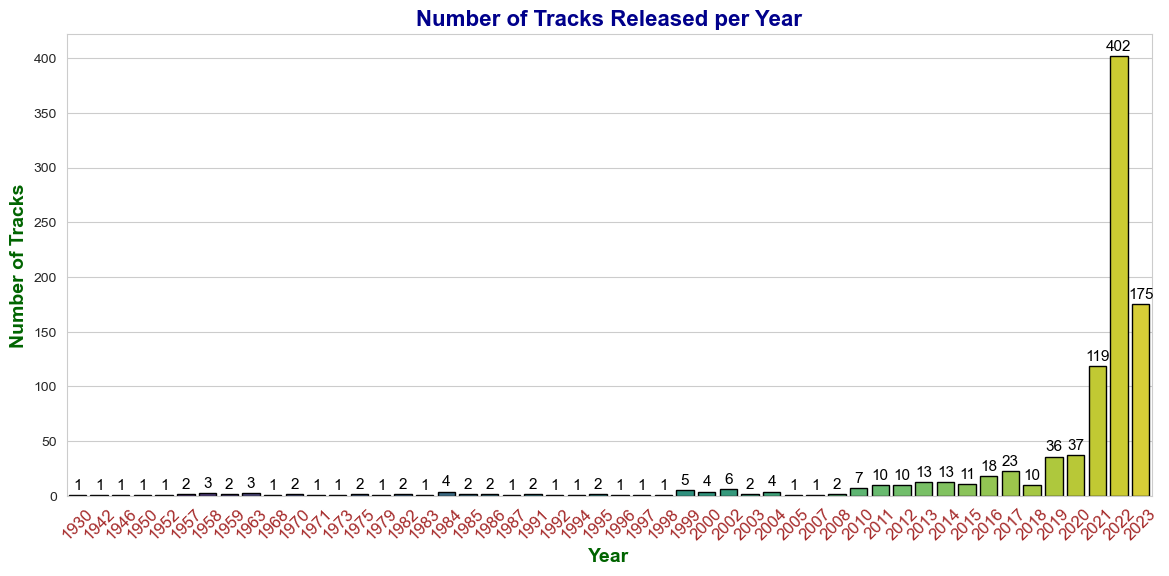

In [11]:
#Sets the plot style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("viridis", len(spotify_dataset['released_year'].unique()))

#Sets the size for the plot
plt.figure(figsize=(14, 6))
sns.countplot(x='released_year', hue='released_year', data=spotify_dataset, palette=palette, edgecolor="black", legend=False)

#Customizes the plot title and labels
plt.title('Number of Tracks Released per Year', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Year', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='darkgreen')

#Displays values on top of each bar
for index, value in enumerate(spotify_dataset['released_year'].value_counts().sort_index().values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=11, color='black')

#Turns x-ticks sideways
plt.xticks(fontsize=12, rotation=45, color='brown')

plt.show()

- The code above plots the Number of Tracks Released per Year, with Year in the x-axis and Number of Tracks in the y-axis. We can observe that the years 2021, 2022, and 2023 are the years where the most number of tracks were released.

### Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

C:\Users\ShadowMatrix\AppData\Local\Temp\ipykernel_5604\190688652.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='released_month', data=spotify_dataset,


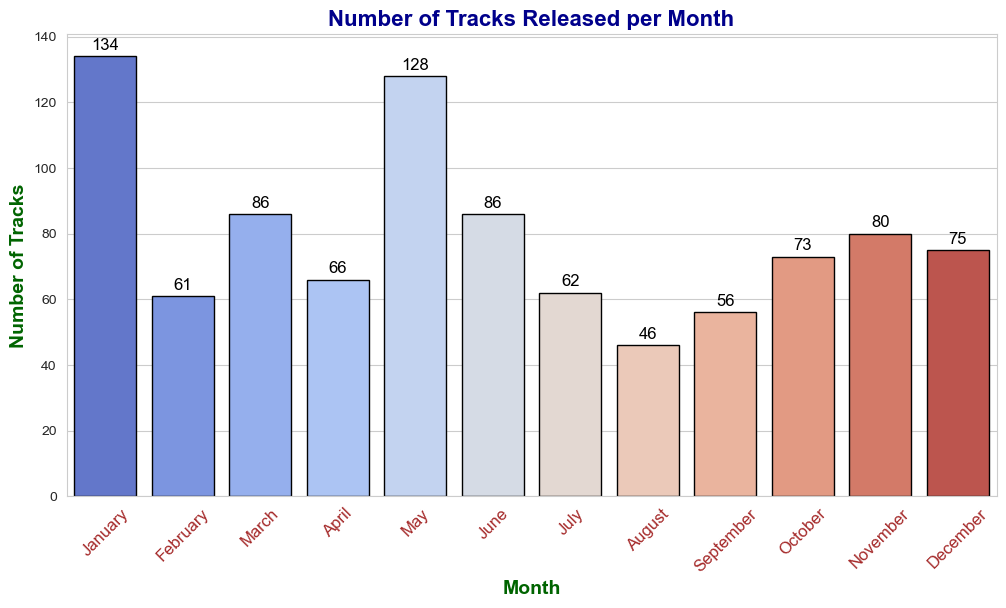

In [12]:
#Map month numbers to month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

#Checks for missing values in 'released_month'
if spotify_dataset['released_month'].isnull().any():
    print("Warning: There are missing values in 'released_month'. They will be dropped.")
    spotify_dataset = spotify_dataset.dropna(subset=['released_month'])

#Converts 'released_month' column to string
spotify_dataset['released_month'] = spotify_dataset['released_month'].map(month_mapping)

missing_months = spotify_dataset[spotify_dataset['released_month'].isna()]
if not missing_months.empty:
    print(f"Warning: These months were not found in the mapping: {missing_months['released_month'].unique()}")

#Defines the month order for the x-axis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

#Sets plot style and color palette
sns.set_style("whitegrid")
palette = sns.color_palette("coolwarm", 12)

#Creates the plot
plt.figure(figsize=(12, 6))
sns.countplot(x='released_month', data=spotify_dataset, 
              palette=palette, edgecolor="black", order=month_order)

#Adds plot title and labels
plt.title('Number of Tracks Released per Month', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='darkgreen')

#Displays values on top of each bar
for i, month in enumerate(month_order):
    count = spotify_dataset['released_month'].value_counts().get(month, 0)
    plt.text(i, count + 2, str(count), ha='center', fontsize=12, color='black')

#Turns x-ticks sideways
plt.xticks(fontsize=12, rotation=45, color='brown')

plt.show()

- The code above plots the Number of Tracks Released per Month, with Month in the x-axis and Number of Tracks in the y-axis. We can observe that the month of January is where the most number of tracks were released. There seems to be a trend where more tracks are released during Christmas and Summer seasons.

## **Genre and Music Characteristics**

### Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?

<function matplotlib.pyplot.show(close=None, block=None)>

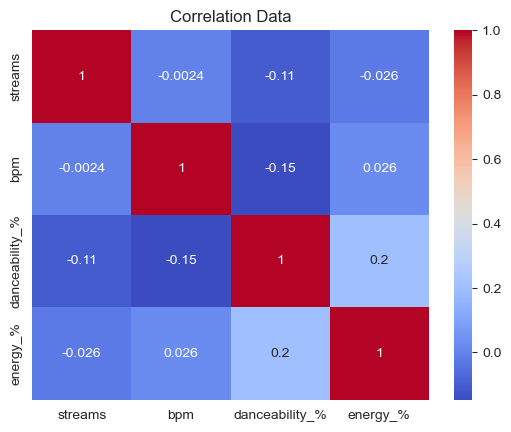

In [21]:
#Finds the correlation data
correl_data = spotify_dataset[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()

#Create a correlation matric with seaborn
sns.heatmap(correl_data, annot = True, cmap = 'coolwarm') 
plt.title("Correlation Data") 
plt.show 

- From the data above, it can be said that danceability, energy, and BPM have minimal effect on a track's streaming popularity. Danceability is the one that is closest among them, but it's still too little, while energy and BPM display virtually no correlation.

### Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

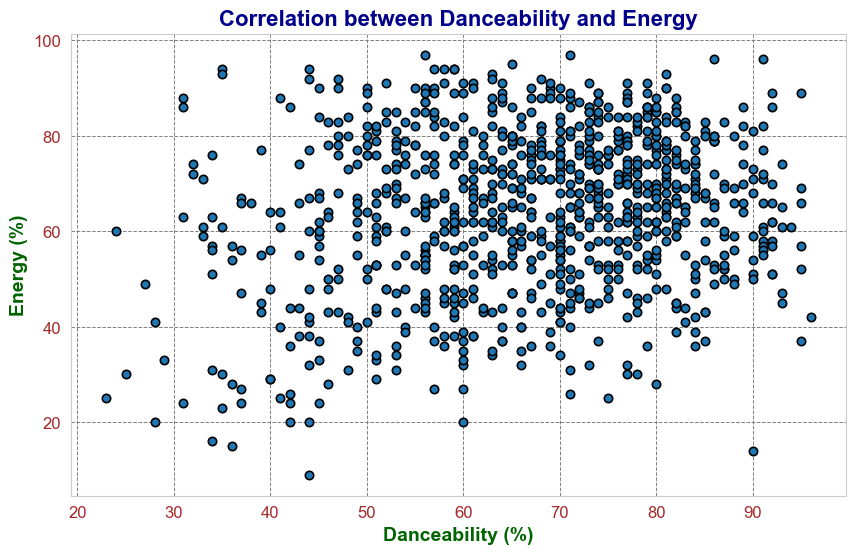

In [14]:
#Sets a style
sns.set_style("whitegrid")

#Creates a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_%', y='energy_%', data=spotify_dataset, edgecolor="black", linewidth=1.2)

#Adds title and labels
plt.title('Correlation between Danceability and Energy', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Danceability (%)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Energy (%)', fontsize=14, fontweight='bold', color='darkgreen')

#Customizes the ticks the grid
plt.xticks(fontsize=12, color='brown')
plt.yticks(fontsize=12, color='brown')
plt.grid(visible=True, linestyle='--', linewidth=0.7, color='gray')

plt.show()

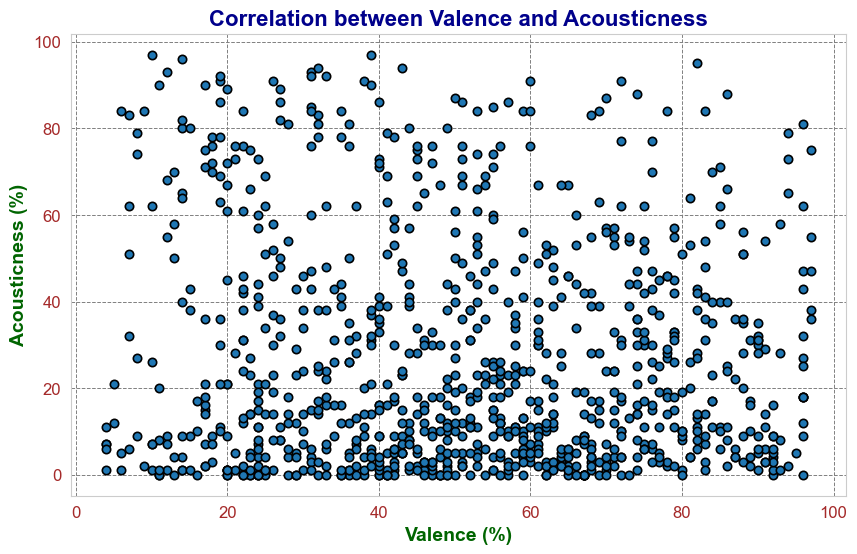

In [15]:
#Sets a style
sns.set_style("whitegrid")

#Creates a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence_%', y='acousticness_%', data=spotify_dataset, edgecolor="black", linewidth=1.2)

#Adds title and labels
plt.title('Correlation between Valence and Acousticness', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Valence (%)', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Acousticness (%)', fontsize=14, fontweight='bold', color='darkgreen')

#Customizes the ticks the grid
plt.xticks(fontsize=12, color='brown')
plt.yticks(fontsize=12, color='brown')
plt.grid(visible=True, linestyle='--', linewidth=0.7, color='gray')

plt.show()

- The first scatter plot above shows a weak linear relationship between danceability and energy percentages, because the data points are dispersed widely across the chart.
- The second scatter plot shows no clear connection between valence and acousticness, which can mean that tracks with various acoustic qualities can be a reflection of a wide spectrum of positivity.

## ** Platform Popularity**

### How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

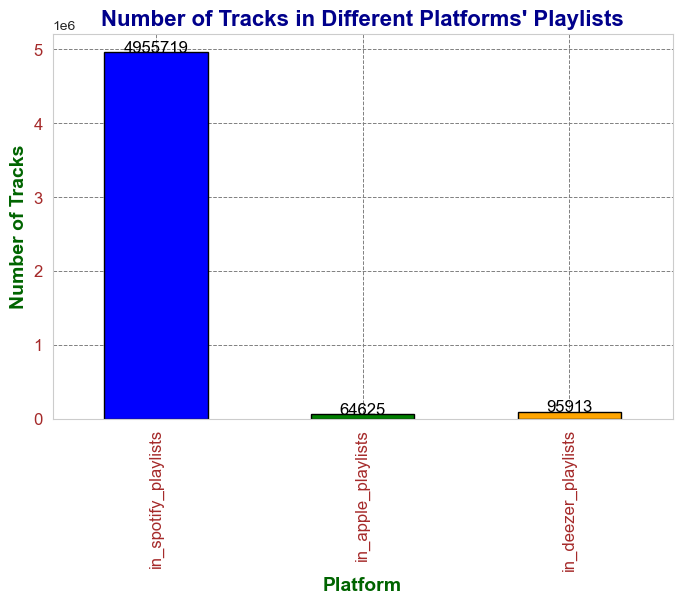

In [16]:
# Convert playlist columns to numeric, forcing errors to NaN if any non-numeric values are present
spotify_dataset['in_spotify_playlists'] = pd.to_numeric(spotify_dataset['in_spotify_playlists'], errors='coerce')
spotify_dataset['in_apple_playlists'] = pd.to_numeric(spotify_dataset['in_apple_playlists'], errors='coerce')
spotify_dataset['in_deezer_playlists'] = pd.to_numeric(spotify_dataset['in_deezer_playlists'], errors='coerce')

# Sum the number of tracks across different playlist columns
playlist_counts = spotify_dataset[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum()

# Plot the playlist counts across different platforms
plt.figure(figsize=(8, 5))
playlist_counts.plot(kind='bar', color=['blue', 'green', 'orange'], edgecolor="black")

# Add title and labels with enhancements
plt.title('Number of Tracks in Different Platforms\' Playlists', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Platform', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Number of Tracks', fontsize=14, fontweight='bold', color='darkgreen')

# Add values on top of each bar
for index, value in enumerate(playlist_counts):
    plt.text(index, value + 10, str(int(value)), ha='center', fontsize=12, color='black')

# Customize ticks and grid
plt.xticks(fontsize=12, color='brown')
plt.yticks(fontsize=12, color='brown')
plt.grid(visible=True, linestyle='--', linewidth=0.7, color='gray')

# Show plot
plt.show()

- Based on the data above, Spotify playlists significantly outnumber those on Apple and Deezer, having a multifold greater number of tracks.

## **Advanced Analysis**

### Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?

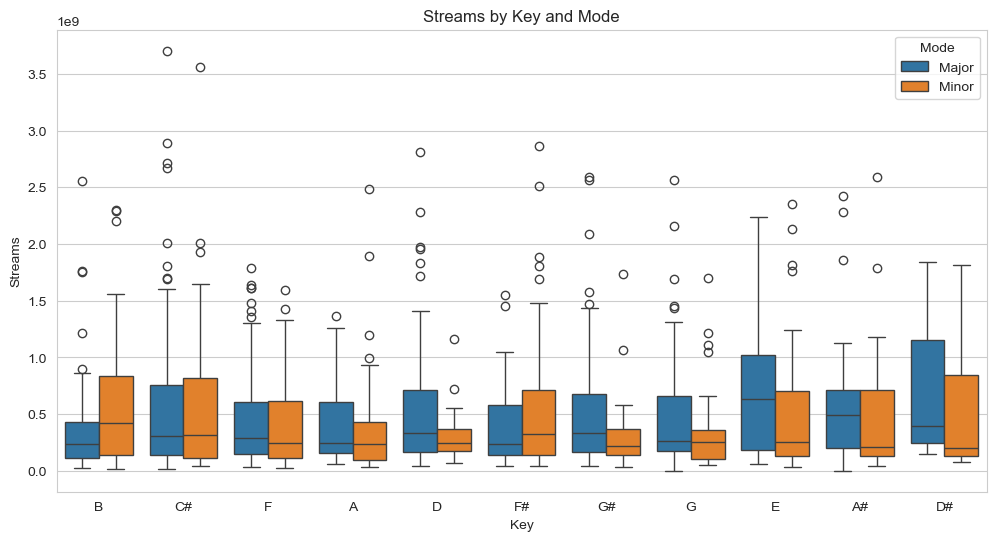

In [22]:
#Analyzes patterns among tracks with the same 'key' or 'mode' and their stream counts
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='streams', hue='mode', data=spotify_dataset)
plt.title('Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.legend(title='Mode', loc='upper right')
plt.show()

Base on the plot above, the tracks in Major mode tend to have higher stream counts than those in Minor mode, with this trend especially prominent in keys like B, C#, and F#. We can also see the trend of high-stream tracks in Major mode as a whole across multiple keys, indicating that Major mode tracks may be more preferred by the people.

### Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.

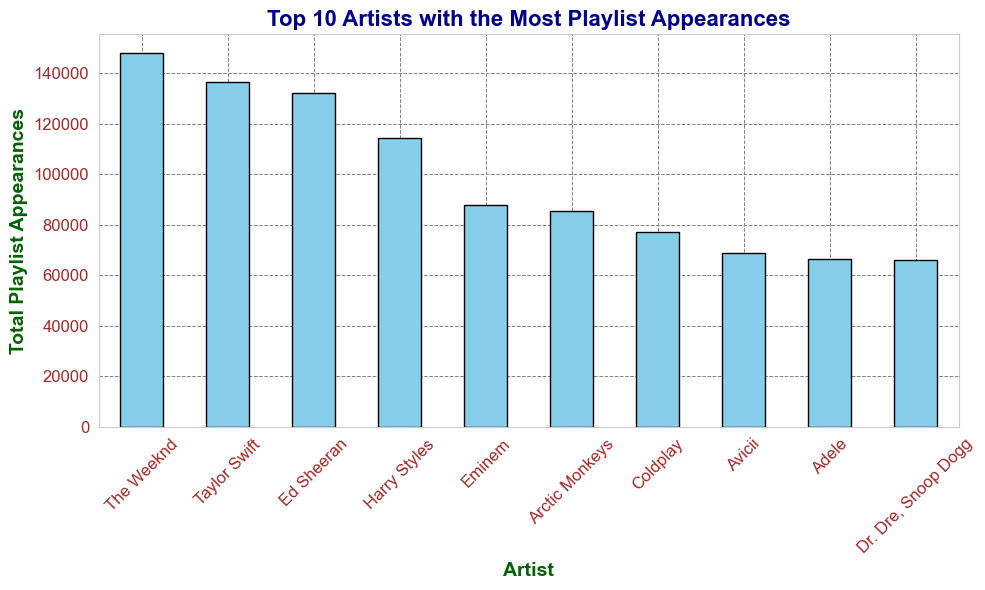

In [23]:
#Calculates total playlist appearances for each artist
artist_playlist_counts = (
    spotify_dataset.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
)

#Plots the top 10 artists
plt.figure(figsize=(10, 6))
artist_playlist_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')

#Adds title and labels
plt.title('Top 10 Artists with the Most Playlist Appearances', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Artist', fontsize=14, fontweight='bold', color='darkgreen')
plt.ylabel('Total Playlist Appearances', fontsize=14, fontweight='bold', color='darkgreen')

#Customizes ticks
plt.xticks(rotation=45, fontsize=12, color='brown')
plt.yticks(fontsize=12, color='brown')

#Customizes grid lines
plt.grid(visible=True, linestyle='--', linewidth=0.7, color='gray')

plt.tight_layout() 
plt.show()

The plot above shows the top 10 artists with the most playlist appearances. It can be observed that pop artists dominate in the top 10. While pop is the primary genre, you can also see a mix of sub-genres like R&B and alternative. The list is balanced with both male and female artists, which shows that gender doesn't really affect popularity in the music industry.